In [1]:
#Note Boyd References a value of 5.7 * 10^-20 likely measured at 1064 nm or 532 nm

from os import path
from copy import deepcopy

from IPython.display import Math, Latex
import sympy as sp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import init_printing

import get_effective_freq_dependence_from_raw_output as main

init_printing()

In [2]:
from matplotlib import __version__ as mpl_v
mpl_v

'3.3.0'

In [7]:
def eV_and_hartree(df):
    df_ev = deepcopy(df)
    df_hartree = deepcopy(df)
    
    df_ev.index = df_ev['freq (eV)']
    df_hartree = df_hartree.drop('freq (eV)', 1)
    
    df_hartree.index = df_hartree['freq (Hartree)']
    df_ev = df_ev.drop('freq (Hartree)', 1)
    return df_ev, df_hartree

def plot_data_frames(dataframes, labels, descripter, x_axis='freq probe (eV)', display_the_dfs=False,
                     plot_measured_ground_state=False, colors=['b','g','r','c','m','k'], ticks=['+','x'],
                     alpha=0.5, yscale="linear", xlims=[None, None], ylims_gamma=[None, None], x_label=None,
                     ylims_chi3=[None, None], shift_measured=False, nochi3=False, nogamma=False,
                     nth_label_to_keep=1, sup_y=None, sup_title=None):
    """
    yscale values: {"linear", "log", "symlog", "logit", 'function', ...}
    """
    assert(len(dataframes) == len(labels))
    assert(nochi3 == False or nogamma == False)
    ticklen = len(ticks)
    colorlen = len(colors)
    
    # display Dataframes
    if display_the_dfs:
        for df in dataframes:
            display(df)
    
    # axis formating
    col_index = 0
    if nochi3 or nogamma:
        size = (6, 4.2)
        no_cols = 1
        if sup_y == None:
            sup_y = 1.25
    else:
        size = (11.5, 3.6)
        no_cols = 2
        if sup_y == None:
            sup_y = 1.35
    if x_label == None:
        x_label = x_axis
    
    if sup_title == None:
        sup_title = "Calculated Rotationally Averaged 3rd Order Response\nDunning Double Zeta Basis"

    # figure formating
    fig, axes = plt.subplots(nrows=1, ncols=no_cols, squeeze=False, figsize=size)    
    fig.suptitle(sup_title, y=sup_y, fontsize=24)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0, wspace=0.6)
    
    # plot gamma
    if nogamma:
        pass
    else:
        for index, df in enumerate(dataframes):
            markers = colors[index%colorlen] + ticks[index%ticklen]
            axes[0][col_index].plot(df[x_axis], df['gamma effective'], markers, label=labels[index])
        y_label = "$|\gamma_{\t_{eff}}|$ (au.)"
        
        axes[0][col_index].set_title("{1} {0}".format("$\gamma_{\t_{effective}}$", descripter), fontsize=24, y=1.13)
        axes[0][col_index].tick_params(labelsize=13)
        axes[0][col_index].set_ylabel(y_label, fontsize=20)
        axes[0][col_index].set_xlabel(x_label, fontsize=20)
        axes[0][col_index].legend()
        axes[0][col_index].set_xlim(xlims[0], xlims[1])
        axes[0][col_index].set_ylim(ylims_gamma[0], ylims_gamma[1])
        axes[0][col_index].set_yscale(yscale)
       # axes[0][col_index].locator_params(axis='y', nbins=10)
        for index, label in enumerate(axes[0][col_index].yaxis.get_ticklabels()):
            if index % nth_label_to_keep !=0:
                label.set_visible(False)
        col_index += 1

    # Plot chi3
    if nochi3:
        pass
    else:
        for index, df in enumerate(dataframes):
            markers = colors[index%colorlen] + ticks[index%ticklen]
            axes[0][col_index].plot(df[x_axis], df['chi3 effective'], markers, label=labels[index], markersize=10)
        if plot_measured_ground_state:
            if shift_measured:
                xpoint = df[x_axis][0]
            else:
                xpoint = 1.1653
            axes[0][col_index].plot([xpoint], [5.7*10**(-20)*(2/3)], 'ro', label="measured - Boyd", markersize=10)
            chi3_NB_xxxx = 0.925 * 10**-13 #esu
            chi3_NB_xxxx *= (4*np.pi/(3**2))*10**-8
            axes[0][col_index].plot([xpoint], [chi3_NB_xxxx*2/3], 'rD', label="measured - CRC ", markersize=10)
            #axes[0][col_index].plot([2.3305], [5.7*10**(-20)/3], 'rx', label="reported ground state 532?")

        y_label = "|$\chi^{(3)}_{\t_{eff}}}$| (SI)"
        axes[0][col_index].set_title("{1} {0}".format("$\chi^{(3)}_{\t_{eff}}}$", descripter), fontsize=24, y=1.13)
        axes[0][col_index].tick_params(labelsize=13, which='both')
        axes[0][col_index].set_ylabel(y_label, fontsize=20)
        axes[0][col_index].set_xlabel(x_label, fontsize=20)
        axes[0][col_index].set_xlim(xlims[0], xlims[1])
        axes[0][col_index].set_ylim(ylims_chi3[0], ylims_chi3[1])
        axes[0][col_index].legend()
        axes[0][col_index].set_yscale(yscale)
        if 'log' in yscale:
            pass
            #axes[0][col_index].LogLocator(base=10.0, subs=[1.0], numdecs=4, numticks=15)
        for index, label in enumerate(axes[0][col_index].yaxis.get_ticklabels()):
            if index % nth_label_to_keep !=0:
                label.set_visible(False)
    plt.show()


    
def get_dfs(dir_path, output_file_name='effective_chi3_freq_response_NBopt_dunningZ_2.csv'):
    output_df = main.main(dir_path, output_file_name, True, True)
    good_df = output_df[output_df.warning_flag != True]
    return output_df, good_df

found file  = state-1_sym-1_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-1_freqd-0.

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,5567.63,5.89882e-21,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,5609.82,5.9608e-21,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,5684.81,6.06523e-21,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,5774.85,6.19404e-21,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,5896.59,6.36616e-21,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,6042.22,6.57473e-21,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,6227.78,6.83923e-21,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,6469.76,7.18089e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,6762.06,7.59725e-21,0
10,0.0715,1.94561,637.25,0.0715,1.94561,637.25,NaN,7145.69,8.14056e-21,0


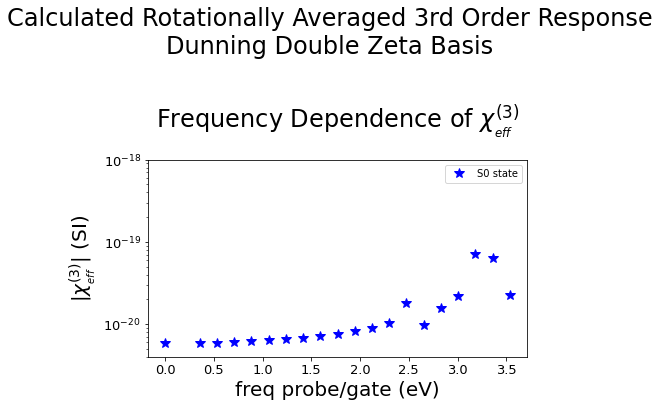

In [4]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state1_sym1_A1')
plot_data_frames([abs(good_df_freq_004c)],
                 ['S0 state'],
                 "Frequency Dependence of",
                 x_axis='freq probe (eV)',
                 x_label = "freq probe/gate (eV)",
                 ticks=['*'],
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[4*10**3, 1*10**6],
                 ylims_chi3=[4*10**-21, 1*10**-18],
                 nochi3=False,
                 nogamma=True,
                 nth_label_to_keep=1)

found file  = state-1_sym-2_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-2_freqd-0.

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,28885.3,3.05504e-20,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,30183.9,3.19793e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,32609.2,3.46493e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,36793.3,3.92554e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,44300.3,4.75159e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,63242.3,6.82785e-20,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,29185.2,3.17574e-20,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,332741,3.6541e-19,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,4390.22,4.87277e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,1.64461e+07,1.84774e-17,0


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,28885.3,3.05504e-20,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,30183.9,3.19793e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,32609.2,3.46493e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,36793.3,3.92554e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,44300.3,4.75159e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,63242.3,6.82785e-20,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,29185.2,3.17574e-20,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,332741,3.6541e-19,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,4390.22,4.87277e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,1.64461e+07,1.84774e-17,0


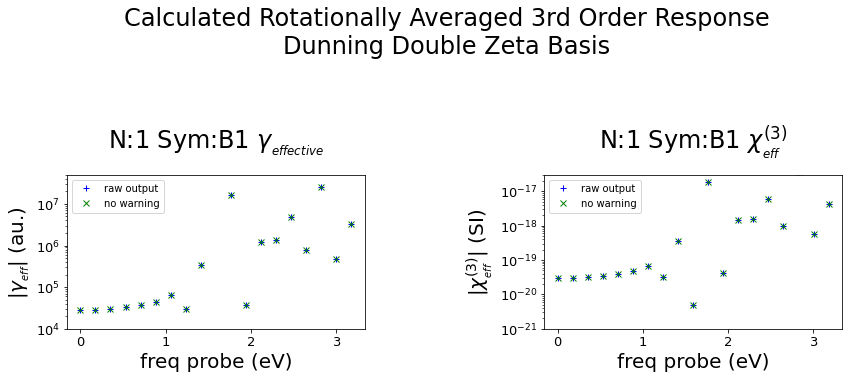

In [172]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state1_sym2_B1')
plot_data_frames([abs(output_df_freq_004c), abs(good_df_freq_004c)],
                 ['raw output', 'no warning'],
                 "N:1 Sym:B1",
                 x_axis='freq probe (eV)',
                 x_label = "freq probe/gate (eV)",
                 ticks=['*'],
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**4, 5*10**7],
                 ylims_chi3=[1*10**-21, 3*10**-17],
                 nochi3=False,
                 nth_label_to_keep=1)

found file  = state-1_sym-3_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-3_freqd-0.

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,15252.6,1.61318e-20,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,15567.8,1.64938e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,16063,1.70679e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,16858.9,1.79871e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,12891,1.38267e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,562954,6.07784e-19,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,1.63672e+06,1.78097e-18,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,15417.2,1.69309e-20,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,6764.26,7.50775e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,14807.6,1.66366e-20,0


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,15252.6,1.61318e-20,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,15567.8,1.64938e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,16063,1.70679e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,16858.9,1.79871e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,12891,1.38267e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,562954,6.07784e-19,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,1.63672e+06,1.78097e-18,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,15417.2,1.69309e-20,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,6764.26,7.50775e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,14807.6,1.66366e-20,0


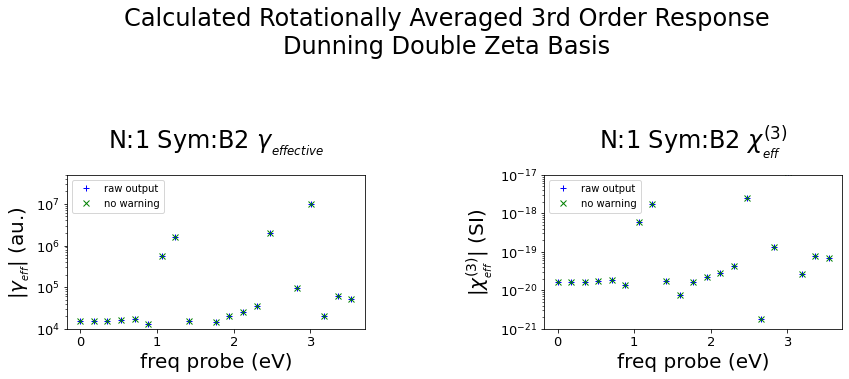

In [171]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state1_sym3_B2')
plot_data_frames([abs(output_df_freq_004c), abs(good_df_freq_004c)],
                 ['raw output', 'no warning'],
                 "N:1 Sym:B2",
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**4, 5*10**7],
                 ylims_chi3=[1*10**-21, 1*10**-17],
                 nochi3=False,
                 nth_label_to_keep=1)

found file  = state-1_sym-4_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-1_sym-4_freqd-0.

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,8506.72,8.9971e-21,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,11901.4,1.26093e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,14198.6,1.5087e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,15227.6,1.62466e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,15701.8,1.68415e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,16190.4,1.74797e-20,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,17061.2,1.85648e-20,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,19690.1,2.16233e-20,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,5526.05,6.13344e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,16506.1,1.85448e-20,0


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,8506.72,8.9971e-21,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,11901.4,1.26093e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,14198.6,1.5087e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,15227.6,1.62466e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,15701.8,1.68415e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,16190.4,1.74797e-20,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,17061.2,1.85648e-20,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,19690.1,2.16233e-20,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,5526.05,6.13344e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,16506.1,1.85448e-20,0


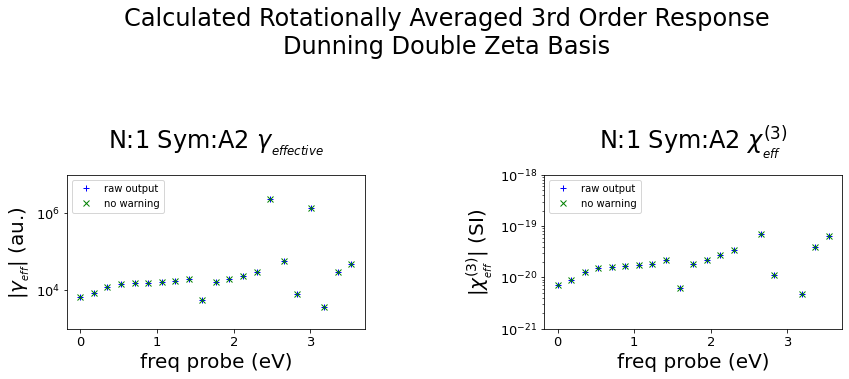

In [170]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state1_sym4_A2')
plot_data_frames([abs(output_df_freq_004c), abs(good_df_freq_004c)],
                 ['raw output', 'no warning'],
                 "N:1 Sym:A2",
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**3, 1*10**7],
                 ylims_chi3=[1*10**-21, 1*10**-18],
                 nochi3=False,
                 nth_label_to_keep=1)

found file  = state-2_sym-1_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-1_freqd-0.

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,119110,1.25976e-19,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,127465,1.35048e-19,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,162216,1.72365e-19,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,175630,1.87382e-19,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,41489.6,4.45013e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,4.97019e+06,5.36599e-18,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,401670,4.3707e-19,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,187316,2.05706e-19,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,2.61833e+06,2.90613e-18,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,9.81859e+07,1.10313e-16,0


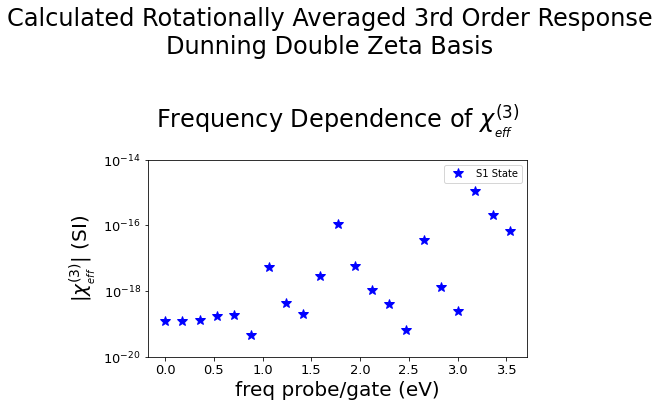

In [44]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state2_sym1_A1')
plot_data_frames([abs(good_df_freq_004c)],
                 ['S1 State'],
                 "Frequency Dependence of",
                 x_axis='freq probe (eV)',
                 x_label = "freq probe/gate (eV)",
                 ticks=['*'],
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**4, 1*10**10],
                 ylims_chi3=[1*10**-20, 1*10**-14],
                 nochi3=False,
                 nogamma=True,
                 nth_label_to_keep=1)

found file  = state-2_sym-2_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-2_sym-2_freqd-0.

<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,28891.9,3.05574e-20,0
1,0.013,0.353748,3504.87,0.013,0.353748,3504.87,NaN,30183.2,3.19786e-20,0
2,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,32607.5,3.46476e-20,0
3,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,36772.4,3.92331e-20,0
4,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,44320.1,4.75373e-20,0
5,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,63310.3,6.8352e-20,0
6,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,29192.5,3.17652e-20,0
7,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,332651,3.65311e-19,0
8,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,4388.56,4.87093e-21,0
9,0.065,1.76874,700.975,0.065,1.76874,700.975,NaN,1.63889e+07,1.84131e-17,0


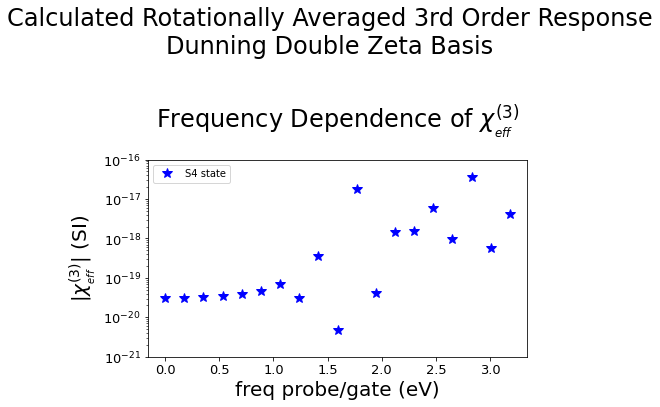

In [45]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state2_sym2_B1')
plot_data_frames([abs(good_df_freq_004c)],
                 ['S4 state'],
                 "Frequency Dependence of",
                 x_axis='freq probe (eV)',
                 x_label = "freq probe/gate (eV)",
                 ticks=['*'],
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**3, 5*10**7],
                 ylims_chi3=[1*10**-21, 1*10**-16],
                 nochi3=False,
                 nogamma=True,
                 nth_label_to_keep=1)

found file  = state-3_sym-2_freqd-0.006500000000000001_freqp-0.006500000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.013000000000000001_freqp-0.013000000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.019500000000000003_freqp-0.019500000000000003_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.026000000000000002_freqp-0.026000000000000002_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.0325_freqp-0.0325_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.03900000000000001_freqp-0.03900000000000001_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.045500000000000006_freqp-0.045500000000000006_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out
found file  = state-3_sym-2_freqd-0.

  File "D:\Documents\qchem_nitrobenzene\parse_gammas.py", line 59, in extract_gammas_and_freq_from_file
    gammas.append(parse_gamma(line))
  File "D:\Documents\qchem_nitrobenzene\parse_gammas.py", line 34, in parse_gamma
    v = float(v)


<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,43006.8,4.5486e-20,0
1,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,83006.7,8.81999e-20,0
2,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,7235.45,7.71964e-21,0
3,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,68108.9,7.30528e-20,0
4,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,13507.4,1.4583e-20,0
5,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,23317.3,2.53722e-20,0
6,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,309.489,3.39875e-22,0
7,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,369783,4.10428e-19,0
8,0.0715,1.94561,637.25,0.0715,1.94561,637.25,NaN,8.73832e+07,9.95492e-17,0
9,0.0845,2.29936,539.211,0.0845,2.29936,539.211,NaN,18086.9,2.13238e-20,0


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0065,0.176874,7009.75,0.0065,0.176874,7009.75,NaN,43006.8,4.5486e-20,0
1,0.0195,0.530622,2336.58,0.0195,0.530622,2336.58,NaN,83006.7,8.81999e-20,0
2,0.026,0.707496,1752.44,0.026,0.707496,1752.44,NaN,7235.45,7.71964e-21,0
3,0.0325,0.88437,1401.95,0.0325,0.88437,1401.95,NaN,68108.9,7.30528e-20,0
4,0.039,1.06124,1168.29,0.039,1.06124,1168.29,NaN,13507.4,1.4583e-20,0
5,0.0455,1.23812,1001.39,0.0455,1.23812,1001.39,NaN,23317.3,2.53722e-20,0
6,0.052,1.41499,876.218,0.052,1.41499,876.218,NaN,309.489,3.39875e-22,0
7,0.0585,1.59187,778.861,0.0585,1.59187,778.861,NaN,369783,4.10428e-19,0
8,0.0715,1.94561,637.25,0.0715,1.94561,637.25,NaN,8.73832e+07,9.95492e-17,0
9,0.0845,2.29936,539.211,0.0845,2.29936,539.211,NaN,18086.9,2.13238e-20,0


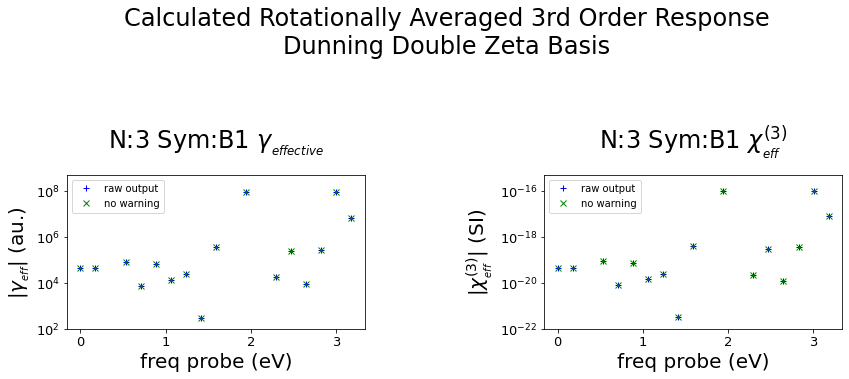

In [178]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_freq_dep_re-opt_geometry\\state3_sym2_B1')
plot_data_frames([abs(output_df_freq_004c), abs(good_df_freq_004c)],
                 ['raw output', 'no warning'],
                 "N:3 Sym:B1",
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=False,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**2, 5*10**8],
                 ylims_chi3=[1*10**-22, 5*10**-16],
                 nochi3=False,
                 nth_label_to_keep=1)

found file  = state-1_sym-1_freqd-0.0856_freqp-0.0428_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out


<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0856,2.32929,532.282,0.0428,1.16465,1064.56,NaN,6791.89,7.69283e-21,0


,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0856,2.32929,532.282,0.0428,1.16465,1064.56,NaN,6791.89,7.69283e-21,0


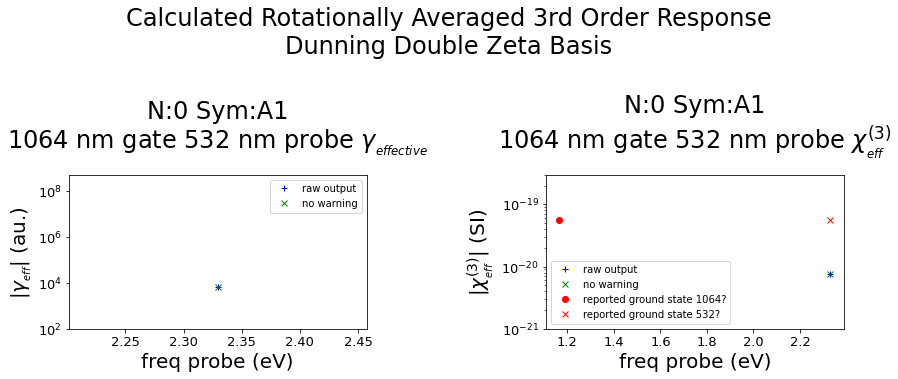

In [20]:
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_1064gate_532probe_re-opt_geometry')
plot_data_frames([abs(output_df_freq_004c), abs(good_df_freq_004c)],
                 ['raw output', 'no warning'],
                 "N:0 Sym:A1\n1064 nm gate 532 nm probe",
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=True,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_gamma=[1*10**2, 5*10**8],
                 ylims_chi3=[1*10**-21, 3*10**-19],
                 nochi3=False,
                 nth_label_to_keep=1)

found file  = state-1_sym-1_freqd-0.0428_freqp-0.0856_spin-1_CN_disp-0.0_ONO_rot-0.0_kind-cubic_gamma_roots-1.out


<IPython.core.display.Math object>

,freq probe (Hartree),freq probe (eV),freq probe (nm),freq drive (Hartree),freq drive (eV),freq drive (nm),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0428,1.16465,1064.56,0.0856,2.32929,532.282,NaN,6793.87,7.69508e-21,0


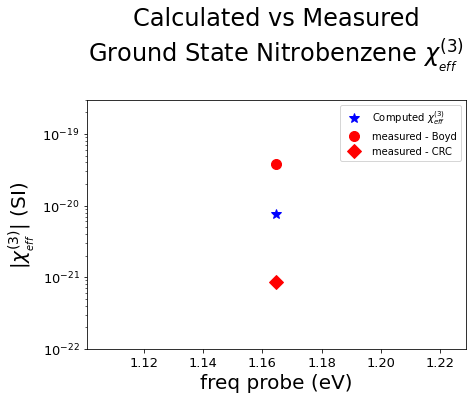

In [13]:
# 532 nm gate 1064 nm probe
output_df_freq_004c, good_df_freq_004c = get_dfs('globus\\mcscf_1064probe_532drive_re-opt_geometry')
plot_data_frames([abs(good_df_freq_004c)],
                 ['Computed $\chi^{(3)}_{eff}$'],
                 "Calculated vs Measured\nGround State Nitrobenzene",
                 ticks=['*'],
                 x_axis='freq probe (eV)',
                 plot_measured_ground_state=True,
                 display_the_dfs=True,
                 yscale="log",
                 ylims_chi3=[1*10**-22, 3*10**-19],
                 nochi3=False,
                 nogamma=True,
                 shift_measured=True,
                 nth_label_to_keep=1,
                 sup_title="")

In [38]:
(((5.7*10**-20)*2/3) - (7.69508e-21))/((5.7*10**-20)*2/3)

In [49]:
#from Sutherland 0824742435 - CRC - Handbook of Nonlinear Optics, Second 2Ed, - (2003)
# chi3 from n_2

n_2_NB = 278*10**-22 #SI units
chi3_NB_xxxx = ((4*1.56)/3)*n_2_NB
display(chi3_NB_xxxx)

In [48]:
#from Sutherland 0824742435 - CRC - Handbook of Nonlinear Optics, Second 2Ed, - (2003)
#chi3 from esu conversion
chi3_NB_xxxx = 0.925 * 10**-13 #esu
chi3_NB_xxxx *= (4*np.pi/(3**2))*10**-8
display(chi3_NB_xxxx)